In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived : 생존여부
Pclass : 등급 
SibSp : 함께 승선한 형제 or 배우자
Parch : 함께 승선한 부모 or 자녀수
Age : 나이
Fare : 운임
Cabin : 선실번호
Embarked : 승선 장소  S=Southhampton, C=Cherbourg, Q=Queenstown

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_bins     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 85.3+ KB


In [46]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Age_bins       0.198653
dtype: float64

Age Cabin Null 값들이 있음 특히 Cabin에는 77%정도로 되어보임

In [78]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
data['group_by_Cabin'] = data[data['Cabin'].isna() == False]['Cabin'].apply(lambda t : t[:1])

In [99]:
data['group_by_Cabin'] = data['group_by_Cabin'].fillna('0')

In [100]:
data[['Survived','group_by_Cabin']].groupby('group_by_Cabin').describe()

Survived                                              
                  count      mean       std  min   25%  50%  75%  max
group_by_Cabin                                                       
0                 687.0  0.299854  0.458528  0.0  0.00  0.0  1.0  1.0
A                  15.0  0.466667  0.516398  0.0  0.00  0.0  1.0  1.0
B                  47.0  0.744681  0.440755  0.0  0.50  1.0  1.0  1.0
C                  59.0  0.593220  0.495450  0.0  0.00  1.0  1.0  1.0
D                  33.0  0.757576  0.435194  0.0  1.00  1.0  1.0  1.0
E                  32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0
F                  13.0  0.615385  0.506370  0.0  0.00  1.0  1.0  1.0
G                   4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0
T                   1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0

'Cabin' 의 첫 알파벳에 따라 분류 후 통계량 계산
값이 있는 경우 없는 경우보다 생존율 차이가 있음을 알 수 있다.


In [52]:
p = data['Survived'].mean()

In [50]:
data['Survived'].std()

0.4865924542648575

평균 생존율은 38.38% 표준편차 0.48

<AxesSubplot:xlabel='Pclass'>

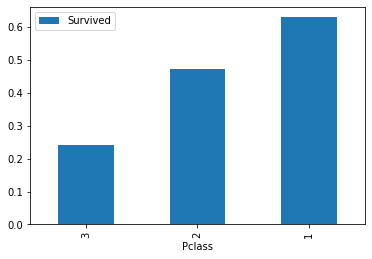

In [47]:
data[['Survived','Pclass'] ].groupby(['Pclass']).mean().sort_values(by='Survived').plot.bar()

In [49]:
data[['Survived','Pclass'] ].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


클래스별 생존율은 급수가 높을 수록 생존 확률이 높아짐

In [55]:
data[['Survived','Sex'] ].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


성별 생존율

In [58]:
data[['Survived','SibSp'] ].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


0 , 1 , 2 에서 특히 높은 생존율을 보임

In [60]:
data[['Survived','Parch'] ].groupby(['Parch']).describe()

Survived                                             
         count      mean       std  min  25%  50%  75%  max
Parch                                                      
0        678.0  0.343658  0.475279  0.0  0.0  0.0  1.0  1.0
1        118.0  0.550847  0.499529  0.0  0.0  1.0  1.0  1.0
2         80.0  0.500000  0.503155  0.0  0.0  0.5  1.0  1.0
3          5.0  0.600000  0.547723  0.0  0.0  1.0  1.0  1.0
4          4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5          5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
6          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

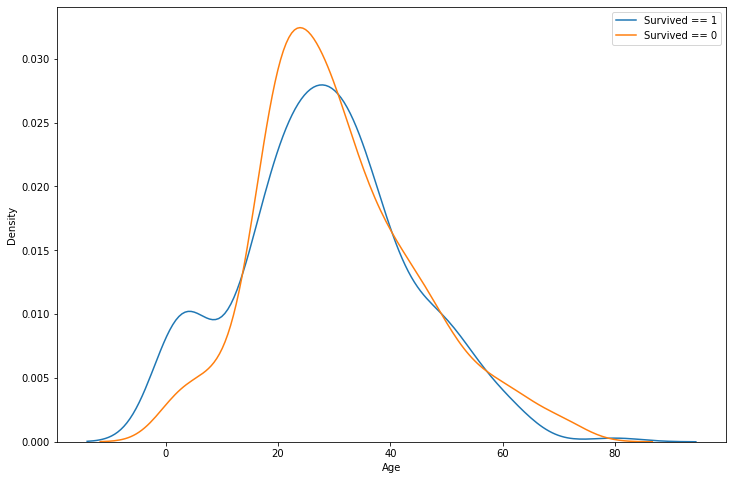

In [83]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
cond = (data['Survived'] == 1)  
sns.kdeplot( data[cond]['Age'], label = 'Survived == 1', ax=ax )
sns.kdeplot( data[~cond]['Age'], label = 'Survived == 0', ax=ax )
plt.legend()
plt.show()

In [38]:
data['Age_bins'] = pd.cut(data['Age'],10)
grouped = data[['Age_bins','Survived','Sex','SibSp']].groupby(['Age_bins','Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

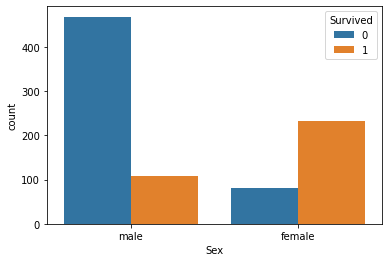

In [41]:
sns.countplot(data=data ,x = 'Sex' , hue = 'Survived')

In [64]:
data[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [146]:
data['Ticket'].str.contains('[A-Z]')

0       True
1       True
2       True
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Ticket, Length: 891, dtype: bool

In [65]:
from sklearn.ensemble import RandomForestClassifier

y = data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data[features])

random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest_model.fit(X, y)

y_test = pd.get_dummies(test[features])
random_forest_model.predict(y_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(random_forest_model, X, y, cv=10)
forest_scores.mean()

0.7912858926342072

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
